In [98]:
# Import libraries

import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [99]:
# Open .txt file

fh = open('SMSSpamCollection.txt', 'r')
content = fh.readlines()
print(len(content))

5574


In [100]:
# Read sample row

print(content[100])
label, data = content[100].split('\t')
print(data.lower())

ham	Please don't text me anymore. I have nothing else to say.

please don't text me anymore. i have nothing else to say.



In [101]:
# Obtain train and test data

labels_list = []
data_list = []
for i in range(len(content)):
    label, data = content[i].split('\t')
    if label == 'ham':
        labels_list.append(0)
    else:
        labels_list.append(1)
    data_list.append(data[:-1].lower())

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_list, labels_list, test_size=0.2, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4459
4459
1115
1115


In [102]:
# Train count-vectorizer

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(X_train)

In [103]:
# Sample count

print(count_vect.vocabulary_.get('go'))

3161


In [77]:
# Naive Bayes classifier trained

nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_counts, y_train)

MultinomialNB()

In [78]:
# Sample prediction

print(nb_classifier.predict(count_vect.transform(["free offer for you"]))[0])

1


In [79]:
# Obtain test predictions

y_pred = []
for elem in X_test:
    y_pred.append(nb_classifier.predict(count_vect.transform([elem]))[0])
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

Accuracy:  0.9865470852017937


<AxesSubplot:>

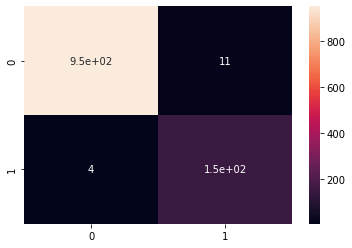

In [76]:
# Plot confusion matrix 

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(cf_matrix, annot=True)

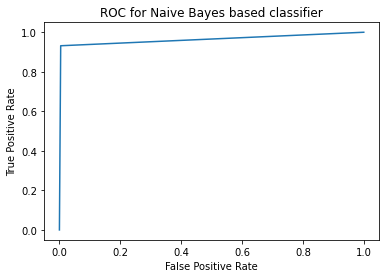

In [80]:
# Plot ROC curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for Naive Bayes based classifier')
plt.show()

In [104]:
# Train SVM model

svm_classifier = SVC(gamma='auto', kernel = 'rbf', random_state = 0)
svm_classifier.fit(x_train_counts, y_train)

SVC(gamma='auto', random_state=0)

In [105]:
# Sample prediction

print(svm_classifier.predict(count_vect.transform(["free offer for you"]))[0])

0


In [106]:
# Obtain test predictions

y_pred = []
for elem in X_test:
    y_pred.append(svm_classifier.predict(count_vect.transform([elem]))[0])
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

Accuracy:  0.8556053811659193


<AxesSubplot:>

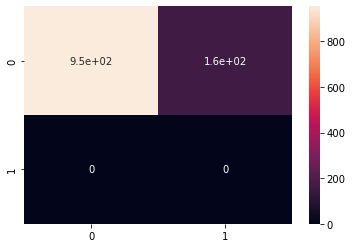

In [107]:
# Plot confusion matrix 

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(cf_matrix, annot=True)

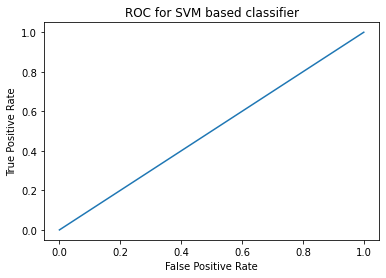

In [89]:
# Plot ROC curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for SVM based classifier')
plt.show()